<a href="https://colab.research.google.com/github/Calebmonroe/DS2/blob/main/HW_2_Caleb_Monroe_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 325 - Week 02 - HW #2

* Exercise 0: preparing and splitting data into training/test data
* Exercise 1: univariate linear regression
* Exercise 2: multivariate linear regression and cross validation
* Exercise 3: Continue with covid data, get to per-capita plots of running avg


In this notebook, we will perform some basic data analysis.  Your homework assignment will be to perform the same steps with different datasets adding your work into this Jupyter notebook in the designated areas.

Note: you can view the [Markdown format](https://daringfireball.net/projects/markdown/syntax) sections are written.  For your reference, there is a nice [Markdown Cheatsheet by Adam Pritchard](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet).  For any of these text sections, double-click on them and Edit to see the underlying syntax (i.e. structure, form) that generates the formatting you see.  Then press Control-Enter (Command-Enter) to interpret the syntax and see how the Markdown displays.


For these exercises, use this Jupyter Notebook to show your work after each corresponding code block comment below. You may add blocks if necessary.

**Be sure to comment all of your code!**


**Note:  For this and all subsequent assignments, you should split your data into a training and test set.  Be sure to set your random_state variable so your analysis is repeatable.**

First, we import necessary libraries into our Python environment.  You will not need to re-import these for your exercises below (its already loaded into the kernel).  
* **numpy** is a scientific computing library which includes fast, efficient, multidimensional arrays (i.e. tables) for our data
* **pandas** builds on numpy to give us efficient data structures (e.g. dataframes) and data analysis tools which are fundamental to data science <!-- * **pandas_profiling** adds tools for analyzing and helping us better understand our data.-->
* **matplotlib** is a 2D plotting library for scientific visualization
* **sklearn** provides a variety of regression, classification, and machine learning algorithms for building models of our data, many alternative **statsmodel**, **scipy**, ...
* **seaborn** one of several vizualization tools we will be exploring this semester

These imports need only occur once before their use, and should not be copied and repeated below.  To start the notebook fresh and rerun the cells of your notebook, "Restart and run all..." (using the button or Kernel menu item).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
sns.axes_style("whitegrid")
sns.set_context("paper")
import statsmodels.api as sm
import sklearn as sk

In [3]:
#imports and auxilliary functions

# here is some code to print a range of model metrics from sklearn
# which may be used to assess its quality

# in particular here you are asked for the R^2 score (aka coefficient of determination)

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    mean_absolute_percentage_error=metrics.mean_absolute_percentage_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_absolute_error: ', round(mean_absolute_error,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('MAPE: ', round(mean_absolute_percentage_error,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# Examining the Data: Advertising

The advertising dataset contains the following data
* 200 samples of the budget for advertising for **TV**,	**Radio**,	and **Newspaper**
* Dependent variable is **Sales**
* Sales are in thousands of units and the budget is in thousands of dollars.


Our first step is to read data from a [comma-separated values (CSV) file](https://en.wikipedia.org/wiki/Comma-separated_values) named "`data.csv`".  We will load the CSV data into a `pandas` dataframe "`df`" like this:


In [4]:
# Load Advertising dataset
web_path = 'http://public.gettysburg.edu/~rjohnson/ds325/' #if using data over web
df = pd.read_csv(web_path+'advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


.describe() generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


.info() prints a concise summary of a DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


plot correlations and distribution for our dataset

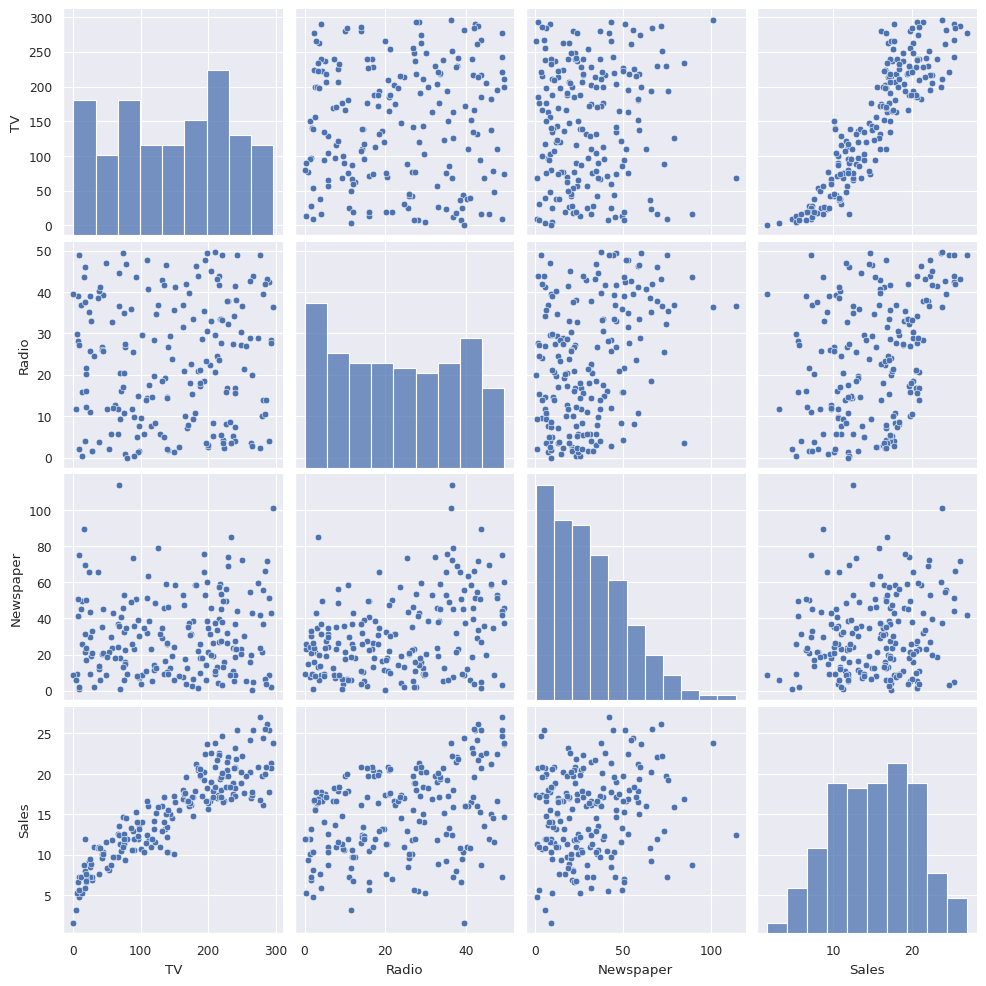

In [7]:
sns.pairplot(df);

Lets quantify the correlations between variables.

<Axes: >

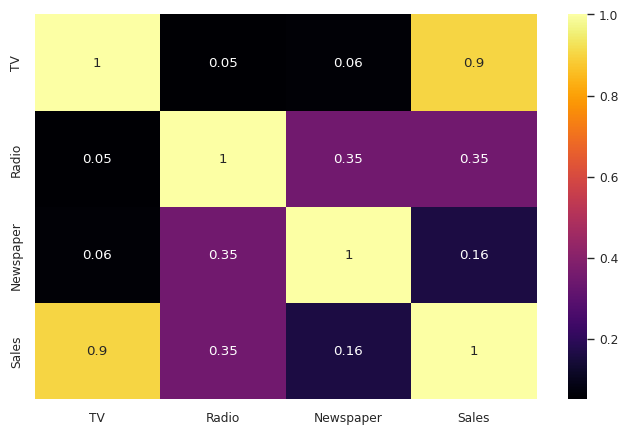

In [8]:
correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(8.1, 5))
sns.heatmap(data=correlation_matrix, annot=True, cmap='inferno')# annot = True to print the values inside the square

We see that TV and Sales have the highest correlation.  However we also see that Radio and Newspaper have a correlations of 0.35 -- we'll come back to that on your Exercise.

#Exercise 0

* practice the same techniques used in class to **load the data**

* Using sklearn's train_test_split method, prepare your advertising data with an 80/20 split of training/testing data.  

* Confirm that the resulting indices are randomly ordered and that the length of each set is 160 for training and 40 for testing.

* **display** samples and statistics of the data

In [9]:
# Enter your solution code here
website = 'http://public.gettysburg.edu/~rjohnson/ds325/'#renamimg the website
ad_df = pd.read_csv(website+'advertising.csv')#reading in the website and then the specific advertising csv
ad_df#printing new df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [10]:
from sklearn.model_selection import train_test_split#importing necessary materials
print(ad_df.shape)#checking shape of dataframe

(200, 4)


In [11]:
X = ad_df[['TV','Radio','Newspaper']]#defining X and y using the ad dataframe using specific columns
y = ad_df[['Sales']]

In [12]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split

In [13]:
len(X_train)#confirming the length of the X training set

160

In [14]:
len(X_test)#confirming the length of the X testing set

40

In [15]:
ad_df.describe()#description of statistics from dataframe

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Exercise 1 (Univariate Linear regression)

In the space below, use the advertising data set to explore how **Sales** (y) depends on **Newspaper** (x).
* perform a **linear regression** of y on x values
* **plot** the regression model and data together
* print the coefficients, their std error, and the model $R^2$ score.
* Use statistics from the regression, and explain the relationship.

In [16]:
from sklearn.linear_model import LinearRegression#importing Linear Regression from sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Enter your solution code and descriptions here
X = ad_df[["Newspaper"]]#defining X and y using the ad dataframe using specific columns
y = ad_df[["Sales"]]

In [18]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)#train test split

In [19]:
model1 = LinearRegression()#defining the linear regression as model 1

In [20]:
model1.fit(X,y)#fitting model 1

LinearRegression()

In [21]:
y_pred = model1.predict(X_test)#defining the y prediciton variable using the model1

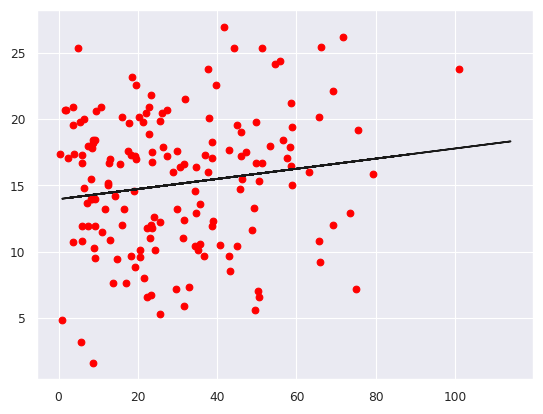

In [22]:
plt.scatter(X_train, y_train, color = 'red', label = "Data")# plotting the data using new y pred variable
plt.plot(X_test, y_pred, color = 'k')#along with the regression line

In [23]:
print(model1.coef_)#pringing coefficient

[[0.038324]]


In [24]:
print(model1.intercept_)#printing intercept

[13.95954865]


In [25]:
r2 = r2_score(y_test, y_pred)#printing R2
print(r2)

0.01924799935544086


**Explaining relationship of above statistics**
The R2 score implies that 1.92% of the variance is explained by the independent variable of newspaper advertising. In other words the R2 score is very low and this model cannot accurately predict based off the given data that it has been introduced to. Additionally, the coefficient is very low which also implies that newspaper advertising is probably not a statistically signifcant predictor of overall sales.

# Exercise 2 (Multivariate linear regression)

In the space below, use the advertising data set to explore how **Sales** depends on various combinations of **Radio**, **Newspaper**, and **TV** advertising spending.  You should give both a qualitative and quantiative description and comparison of your results using the **cross-validation** method shown in class.
* perform a **linear regression** of:

>*    Sales vs. Newspaper+Radio

>*    Sales vs. Newspaper+Radio+TV

For each model:     
* print the model coefficients, their associated standard errors, and the model $R^2$ score.
* Using statistics from the regression describe the relationships.
* Quantitatively and qualitativley compare the quality of your multivariate models.
* Evaluate your model using cross validation and determine which model is best and why.

In [26]:
from sklearn.model_selection import cross_val_score#importing relavent materials
from sklearn.pipeline import make_pipeline

In [27]:
# Enter your solution code and descriptions here
model = sm.OLS.from_formula('Sales ~ Newspaper+Radio', data = ad_df)#creating the model using the method
#described in class
result = model.fit() #fitting the model
print(result.summary()) #printing a summary of the results

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.89
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           2.28e-06
Time:                        22:44:00   Log-Likelihood:                -603.03
No. Observations:                 200   AIC:                             1212.
Df Residuals:                     197   BIC:                             1222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0607      0.728     16.556      0.0

**#Description of relationships from above regression statistics**
According to the R squared value in the regression results above, only 12.4% of the variance of sales is explained by the independent variables of newspaper and radio. It's also important to analyze the P values in order to assess statistical significance. The P value is 0.000 for radio which means that spending on radio advertising is a statiscally significant predictor for overall sales. The P value for newspaper is 0.585, which means that spending on newspaper advertising is not a statistically significant predictor of overall sales. This can also be explained by looking at the ratio between coefficients and the calculated standard errors, which is expressed through the T scores. The Radio T score is much higher than that of Newspaper, which implies stronger evidence for the affect on the radio advertisement spending on overall sales.

In [28]:
X = ad_df[['Newspaper','Radio']] #creating X and y using the original dataframe and selected columns
y = ad_df[['Sales']]

In [29]:
modelXdf = ad_df[['Newspaper','Radio']] #Beginning of model using cross validation method used in class
modelydf = ad_df[['Sales']]
model_X = np.array(modelXdf)
model_y = np.array(modelydf)

In [30]:
Lr = make_pipeline(LinearRegression()) #Creating new linear regression using pipeline method

In [31]:
Lr.fit(model_X, model_y) #Fitting the model using the new model X and model y variables

Pipeline(steps=[('linearregression', LinearRegression())])

In [32]:
LrRMSE = -cross_val_score(Lr, model_X, model_y, scoring="neg_root_mean_squared_error", cv=10)
LrRMSE #using RMSE method from class to calculate new cross validation statistics

array([5.24260035, 4.85362051, 4.83410096, 4.89806192, 3.99276877,
       4.82339445, 6.73540005, 4.76239825, 4.92686544, 4.92984715])

In [33]:
pd.Series(LrRMSE).describe()#displaying these statistics for interpretation

count    10.000000
mean      4.999906
std       0.686556
min       3.992769
25%       4.826071
50%       4.875841
75%       4.929102
max       6.735400
dtype: float64

In [34]:
model2 = sm.OLS.from_formula('Sales ~ Newspaper+Radio+TV', data = ad_df)#creating the model using the method
#described in class
result = model2.fit() #fitting the model
print(result.summary()) #printing a summary of the results

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           8.13e-99
Time:                        22:44:00   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

**#Description of relationships from above regression statistics**
The R squared value in the regression results above implies that 90.3% of the variance of sales is explained by the independent variables of newspaper, radio, and TV. The P value is 0.000 for radio and TV which means that spending on radio and TV advertising are statiscally significant predictors for overall sales. The P value for newspaper is 0.954, which means that spending on newspaper advertising is not a statistically significant predictor of overall sales. This can also be explained by looking at the ratio between coefficients and the calculated standard errors, which is expressed through the T scores. The Radio and TV T scores is much higher than that of Newspaper, which implies stronger evidence for the affect on the radio advertisement spending on overall sales.

In [35]:
modelXdf2 = ad_df[['Newspaper','Radio', 'TV']]#Beginning of model using cross validation method used in class
modelydf2 = ad_df[['Sales']]
model_X2 = np.array(modelXdf2)
model_y2 = np.array(modelydf2)

In [36]:
Lr2 = make_pipeline(LinearRegression())#Creating new linear regression using pipeline method

In [37]:
Lr2.fit(model_X2, model_y2) #Fitting the model using the new model X and model y variables

Pipeline(steps=[('linearregression', LinearRegression())])

In [38]:
LrRMSE2 = -cross_val_score(Lr2, model_X2, model_y2, scoring="neg_root_mean_squared_error", cv=10)
LrRMSE2 #using RMSE method from class to calculate new cross validation statistics

array([1.61140378, 1.88755852, 1.56650451, 1.28123352, 1.3159483 ,
       1.3928588 , 2.25156971, 2.05617196, 1.65699869, 1.56477331])

In [39]:
pd.Series(LrRMSE2).describe()#displaying these statistics for interpretation

count    10.000000
mean      1.658502
std       0.318337
min       1.281234
25%       1.435837
50%       1.588954
75%       1.829919
max       2.251570
dtype: float64

**#Quantitative comparisson and evaluation of models using the cross validation method.**
Considering the R squared values, I believe that the second model with Newspaper, Radio, and TV more acurately predicts sales than the first model. The R squared value for the second model is significantly higher than the R squared value of the first model, which shows that the second model explains more variance than the first. It is also important to use the results from the cross-validation method. The mean for the first model is 4.99, whereas the mean for the second model is 1.65. In this case, a lower mean is desireable because it shows that the second models predictions are relatively accurate to the folded data within cross-validation. In simple terms, the second model responds better to new data than the first model, making it the better, more effective model in this case.

#**Mastery Level Question 1**
Quantitatively compare and discuss the quality of your models using:
* TV only
* Radio+Newspaper
* Radio+TV
* Newspaper+TV
* Radio+Newspaper+TV

Be sure you are clearly presenting your results and comparisons.

In [40]:
#Enter your Mastery Level Question here

#**Mastery Level Question 2**
Explore using a non-linear model for your above regressions.  Fit the data using a 2nd-degree polynomial function instead.  Quantitatively and qualitatively discuss your results and include plots to support your discussion.

In [41]:
#Enter your Mastery Level Question here

# Exercise 3 prelude - Continuing with the COVID data visualizations

Below are a few cells to get us to where we left off at the end of HW 1

In [42]:
s_o = {'User-Agent': 'Mozilla/5.0'}
# the url for covid cases
cases_url = 'https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv'
cases = pd.read_csv(cases_url, storage_options=s_o, header=None, low_memory=False)
cases_h = pd.read_csv(cases_url, storage_options=s_o, parse_dates=True)

pop_url = 'https://static.usafacts.org/public/data/covid-19/covid_county_population_usafacts.csv'
pop = pd.read_csv(pop_url, storage_options=s_o, header=None, low_memory=False)

deaths_url = 'https://static.usafacts.org/public/data/covid-19/covid_deaths_usafacts.csv'
deaths = pd.read_csv(deaths_url, storage_options=s_o, header=None, low_memory=False)

In [43]:
# stripping the trailing spaces off the County Names
tcases_h = cases_h  # making a copy
cty_list = tcases_h['County Name'].str.rstrip('. \n\t') # striping the space
cty_list_df = pd.DataFrame({'County Name': cty_list})

tcases_h = cases_h  # resetting our copy to original

tcases_h['County Name'] = cty_list_df['County Name']
cases_h = tcases_h

In [44]:
#prepare the new_cases dataframe
t_cases = cases.transpose();
dates = pd.to_datetime(t_cases[0][4:])
t_cases_cols = t_cases.loc[0,2:56045]
cts = t_cases.iloc[4:,2:]; cts = cts.astype(int); ncts= cts.to_numpy()
new_cases = pd.DataFrame(ncts,index=dates,columns=t_cases_cols)

In [45]:
# prepare the new_deaths dataframe
t_deaths = deaths.transpose() # transpose the deaths array
t_deaths_cols = t_deaths.loc[0,2:56045] # preparing the same as above
d_cts = t_deaths.iloc[4:,2:]; d_cts = d_cts.astype(int); nd_cts = d_cts.to_numpy()
new_deaths = pd.DataFrame(nd_cts,index=dates,columns=t_deaths_cols)

In [46]:
# prepare the population dataframe
# its structure will be such that we can call Maricopa county's population by:  new_pop['4013']
t_pop = pop.transpose()
t_pop_cols = t_pop.loc[0,2:56045]
p_cts = t_pop.iloc[3:,2:]; p_cts = p_cts.astype(int); np_cts = p_cts.to_numpy()
new_pop = pd.Series(np_cts[0], index=t_pop_cols)
#new_pop['4013']

In [47]:
#tpop1 = pop.loc[pop['countyFIPS']==4013]  # Maricopa; get the county pop data
#pop1 = int(tpop1['population']) # cast it as an int
#pop1 = int(new_pop['4013']) # cast it as an int

c_percap1 = new_cases['4013']/new_pop['4013'] # compute the percapita cases
d_percap1 = new_deaths['4013']/new_pop['4013'] # compute the percapita cases

#tpop2 = pop.loc[pop['countyFIPS']==36005] # Bronx
#pop2 = int(tpop2['population'])
#pop2 = int(new_pop['36005'])
c_percap2 = new_cases['36005']/new_pop['36005']
d_percap2 = new_deaths['36005']/new_pop['36005']

Text(0.5, 0, 'date')

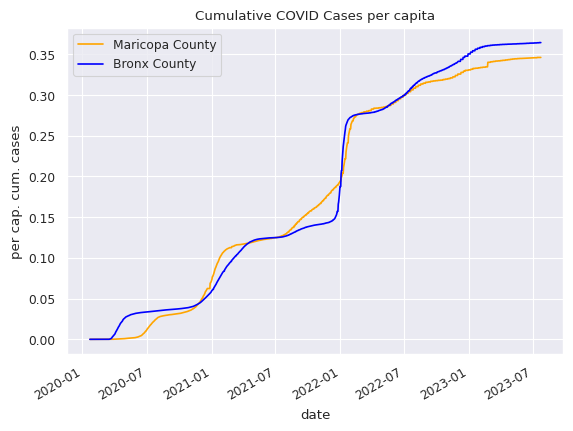

In [48]:
plt.close('all'); # makes sure I'm starting fresh
plt.figure();  # instantiate my figure object
plt.title('Cumulative COVID Cases per capita')

ax = c_percap1.plot.line(color='Orange', label="Maricopa County");
c_percap2.plot.line(color='Blue', label="Bronx County");
ax.legend(loc='upper left', frameon=True)
plt.ylabel('per cap. cum. cases')
plt.xlabel('date')

Text(0.5, 0, 'date')

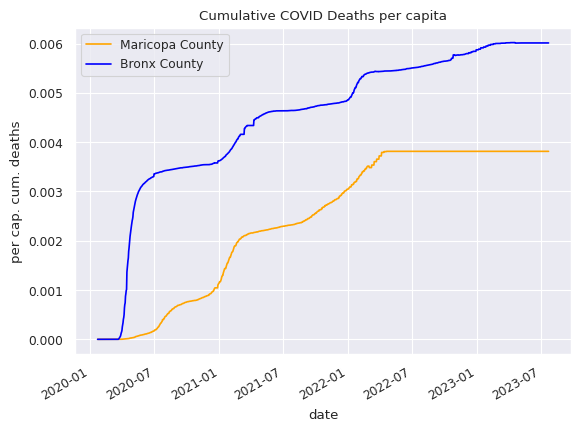

In [49]:
plt.close('all'); # makes sure I'm starting fresh
plt.figure();  # instantiate my figure object
plt.title('Cumulative COVID Deaths per capita')

ax = d_percap1.plot.line(color='Orange', label="Maricopa County");
d_percap2.plot.line(color='Blue', label="Bronx County")
ax.legend(loc='upper left', frameon=True)
plt.ylabel('per cap. cum. deaths')
plt.xlabel('date')

So, on a per capita basis, the situation looks even worse in the Bronx than even the number of cases intially suggested

The above analysis is looking at cumulative cases and cumulative deaths over time.  In order to asses the severity of COVID at a given time, it is not the cumulative cases or deaths that are relevant, but rather the *new* cases and deaths.  So, how can we compute the new cases and deaths using cumulative data?

#Exercise 3
Describe an algorithm that you could use on your custom _cases_ or _deaths_ dataframes you created, that would permit you to calculate the **new per-capita** covid cases as a function with time.

Since you are not being asked to actually write this portion of the program, you need to be specific in your description.  Be clear about what transformation(s) or loop(s) you think would work to obtain this.  

In [50]:
#Enter a thorough description of your algorithm here
#The first step to this calculation would be finding the number amount of daily cases and deaths that have taken
#place over time. In order to do this, I would use the .diff function on the values dataframe because there are no
#additional variables in this set of data, only the time series dates and the cumulative cases. The .diff function
#create new data by subtracting the previous day's covid cases in order to find the new cases specific to that day.
#This function would allow the data to be transformed using the continuous loop of the .diff function. I could
# store this data in a new column titled [daily_cases]. From here, I would have to calculate the per capita daily
#values of cases. One way to do this is to take the new column of daily cases and then divide these values by
#the overall population of that particular county, which is accessible in the population df that we created.
#Dividing the daily cases by the population would help us create a final new column which could be titled
#[daily_cases_per_capita] with the specific calculations for each county. Utilizing a fill function may also
#be useful for values that appear as non-intergers in the data set in order to convert them to integer format.

# Mastery Level Question 3

Write a program to perform the algorithm you suggest above.  Verify that it works and compare the new covid cases and deaths across several counties.

# Exercise 4 (Feedback)

Your feedback is valuable to me as I strive to meet my expectations to your ablities.   Please take a few minutes to leave me some feedback. You may answer any or all of the following.  Your comments here will have no affect on your grade.

1. How did the classes go this week?  Did it meet your expectations?

I thought classes went well this week, I enjoy the lactures and also having free time to work on the homework or projects. This is conveniant because we are able to ask you question if needed.
2. Do you have any questions about the course or schedule?

What is the best way to prepare for exams? In other words, how would you recommend that I study so that I learn as much as I can and also perform well on the exams?

3. Any special topics you would like to see that aren't on the schedule?

Not at the moment.
4. Any other comment/questions.